Discretization of Numerical variables

In [2]:
import numpy as np
import pandas as pd

In [3]:
customer_df=pd.read_csv("datasets/Customer.csv")
customer_df.head()

,IS_TENT,GENDER,AGE,MARITAL_STATUS,PROFESSION
0,False,M,27,Single,Professional
1,False,F,39,Married,Other
2,False,F,39,Married,Other
3,False,F,56,Unspecified,Hospitality
4,False,M,45,Married,Retired


In [4]:
categories,bins=pd.cut(customer_df['AGE'],3,retbins=True,labels=['Teen','Mid','Old'])

In [16]:
categories.head()

0    Teen
1     Mid
2     Mid
3     Old
4     Mid
Name: AGE, dtype: category
Categories (3, object): [Teen < Mid < Old]

you can see pandas is very helpful to transform them into correct categories
we can use sklearn KBinsDiscretizer to discretize data

In [17]:
from sklearn.preprocessing import KBinsDiscretizer
enc=KBinsDiscretizer(n_bins=3,encode='ordinal',strategy='uniform')

In [18]:
enc.fit(customer_df['AGE'].values.reshape(-1,1))

KBinsDiscretizer(encode='ordinal', n_bins=3, strategy='uniform')

In [19]:
x=enc.transform(customer_df['AGE'].values.reshape(-1,1))

In [20]:
x[:5]

array([[0.],
       [1.],
       [1.],
       [2.],
       [1.]])

when we initialize the estimator object with encode as ordinal then bin identifiers will be integer values,and we select strategy = uniform when we want the bin interval identical

In [21]:
enc.bin_edges_

array([array([17.        , 34.33333333, 51.66666667, 69.        ])],
      dtype=object)

In [34]:
x=[[12,34,45],[99,22,-10],[32,-14,35],[23,22,18]]

In [35]:
from sklearn.preprocessing import KBinsDiscretizer
enc=KBinsDiscretizer(n_bins=3,encode='ordinal',strategy='quantile')
enc.fit(x)
y=enc.transform(x)
y[:5]

c:\users\abhunia\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\preprocessing\_discretization.py:193: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)


array([[0., 1., 2.],
       [2., 1., 0.],
       [2., 0., 2.],
       [1., 1., 1.]])

when we select the strategy as quantile all features must be having same number of data points and data is bucketed with respect to each feature.

In [36]:
enc.bin_edges_

array([array([12., 23., 32., 99.]), array([-14.,  22.,  34.]),
       array([-10.,  18.,  35.,  45.])], dtype=object)

In [91]:
cars_df=pd.read_csv('datasets/cleaned_cars.csv')
cars_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin,Age
0,18.0,8,307.0,130,3504,12.0,US,49
1,15.0,8,350.0,165,3693,11.5,US,49
2,18.0,8,318.0,150,3436,11.0,US,49
3,17.0,8,302.0,140,3449,10.5,US,49
4,15.0,8,429.0,198,4341,10.0,US,49


In [92]:
X=cars_df[['horsepower']]
Y=cars_df['mpg']

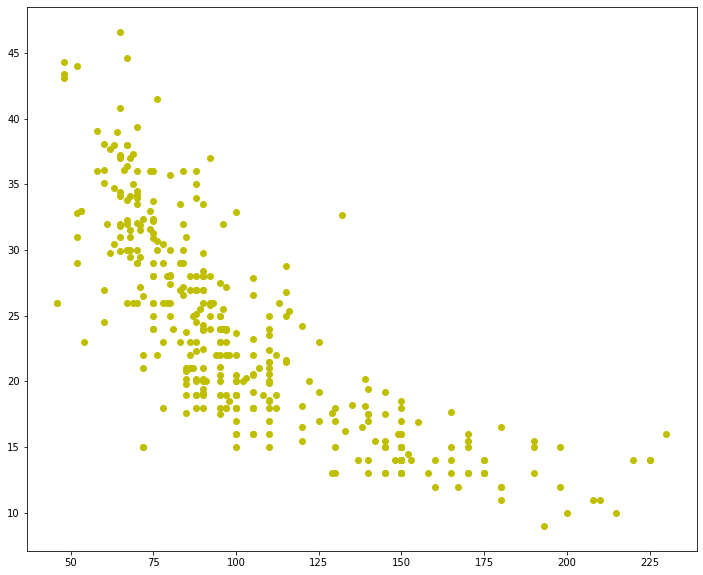

In [93]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
plt.scatter(X,Y,color='y')
plt.show()

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [95]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [96]:
linearModel=LinearRegression()

In [97]:
linearModel.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [98]:
y_pred=linearModel.predict(x_test)

In [99]:
from sklearn.metrics import r2_score

In [100]:
print('Accuracy of the model is: ',r2_score(y_test,y_pred))

Accuracy of the model is:  0.6006701054450805


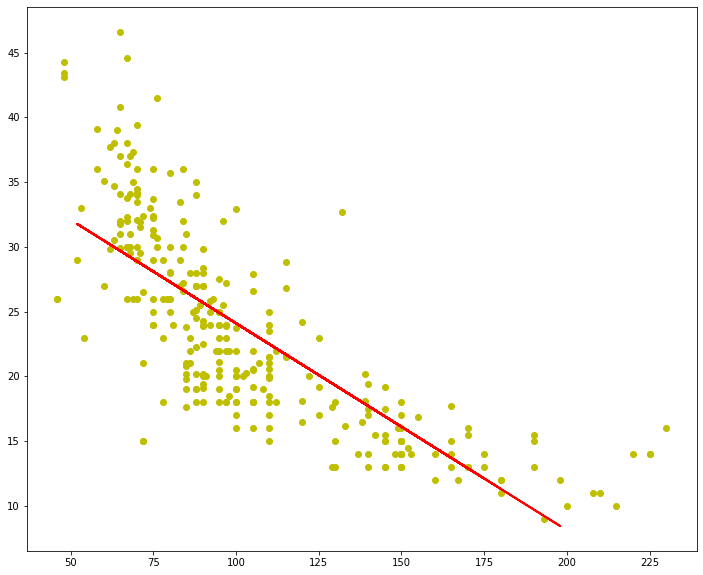

In [101]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
plt.plot(x_train,y_train,'o',c='y')
plt.plot(x_test,y_pred,linewidth=2,color='r',linestyle='-')
plt.show()

In [102]:
enc=KBinsDiscretizer(n_bins=20,encode='ordinal',strategy='uniform')

In [103]:
x_binned=enc.fit_transform(x_train)
x_test_binned=enc.transform(x_test)

In [109]:
reg=LinearRegression().fit(x_binned,y_train)

In [111]:
y_pred=linearModel.predict(x_test_binned)

In [112]:
print('Accuracy of the model is: ',r2_score(y_test,y_pred))

Accuracy of the model is:  0.5795192864282253
